# Performances Analisys - HOG and YOLO

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [36]:
# Probably this lines of code will work only if they are used in google colab and not localy on a user's PC
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [37]:
# Folder where all files are
PATH_FOLDER = "/content/gdrive/MyDrive/Colab Notebooks/vehicle_counting/"

## Metrics

In [38]:
mAP = pd.read_excel(PATH_FOLDER + 'performances_analysis/metrics.xlsx', usecols='A:F')
mAP.head()

,Unnamed: 0,mAP 0.5,mAP 0.4,mAP 0.3,mAP 0.2,mAP 0.1
0,HOG SW,7.08%,15.52%,27.15%,31.76%,31.76%
1,HOG SS,0.83%,2.86%,2.86%,3.37%,3.37%
2,YOLO v2,4.14%,4.14%,4.14%,4.14%,4.14%
3,YOLO v3,71.40%,72.04%,72.04%,72.04%,72.04%


In [39]:
fps = pd.read_excel(PATH_FOLDER + 'performances_analysis/metrics.xlsx', usecols='I,K')
fps.head()

,Unnamed: 8,FPS
0,HOG SW,14.536198
1,YOLO v2,11.947849
2,YOLO v3,5.015862
3,NaN,NaN


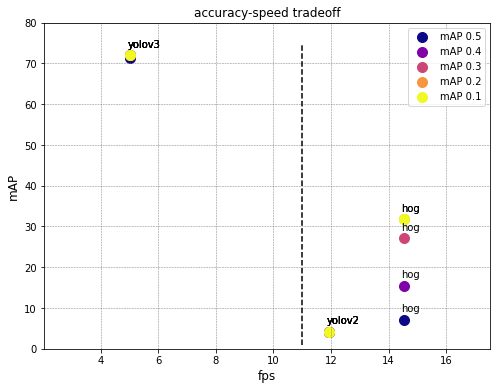

In [99]:
x = 5
my_cmap = cm.get_cmap('plasma', x)
fig, ax = plt.subplots(1,1, figsize=(8,6))

labels = ['mAP 0.5', 'mAP 0.4', 'mAP 0.3', 'mAP 0.2', 'mAP 0.1']
ann = ['hog', 'yolov2', 'yolov3']

ax.vlines(11, 1, 75, colors='k', linestyle='--')

for i in range(x):
  ax.scatter(float(fps.iloc[0,1]), float(str(mAP.iloc[0,i+1])[:-1]), color=my_cmap(i), s=100, label=labels[i]) # HOG SW
  ax.scatter(float(fps.iloc[1,1]), float(str(mAP.iloc[2,i+1])[:-1]), color=my_cmap(i), s=100)                  # yolo v2
  ax.scatter(float(fps.iloc[2,1]), float(str(mAP.iloc[3,i+1])[:-1]), color=my_cmap(i), s=100)                  # yolo v3

  offset_x = -0.1
  offset_y = 2

  ax.annotate(ann[0], (float(fps.iloc[0,1]) + offset_x, float(str(mAP.iloc[0,i+1])[:-1]) + offset_y))
  ax.annotate(ann[1], (float(fps.iloc[1,1]) + offset_x, float(str(mAP.iloc[2,i+1])[:-1]) + offset_y))
  ax.annotate(ann[2], (float(fps.iloc[2,1]) + offset_x, 74))

  ax.legend()
  ax.set_xlim(min(fps['FPS'])-3, max(fps['FPS'])+3)
  ax.set_ylim(0, 80)
  ax.grid(color='gray', linestyle='--', linewidth=0.5)
  ax.set_xlabel('fps', fontsize='large')
  ax.set_ylabel('mAP', fontsize='large')
  ax.set_title('accuracy-speed tradeoff')

  plt.savefig(PATH_FOLDER + 'performances_analysis/metrics.jpg')